#### The followng notebook is based on:
_Documentation SVM learn_
http://scikit-learn.org/stable/modules/svm.html


_One class SVM_

http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/

_Outlier detection_

http://scikit-learn.org/stable/modules/outlier_detection.html

_Face Recognition on a subset of the Labeled Faces in the Wild_
http://nbviewer.jupyter.org/github/ogrisel/notebooks/blob/master/Labeled%20Faces%20in%20the%20Wild%20recognition.ipynb


Last time we learned that the problem of separating two classes by a hyperplane was equivalent to maximize $$\frac{2}{||w||}$$  such that $$y_i(wx_i+b)-1 > 0,$$ or to minimize

$$q(\alpha)=\sum \alpha_i -\frac{1}{2}\sum\sum \alpha_i\alpha_j y_i y_j  (\phi(x_i), \phi(x_j))$$ such that $$C\geq\alpha_i\geq 0, \sum y_i\alpha_i=0.$$
   


We defined Kernels as functions $K(x_1, x_2)=<\phi(x_1), \phi(x_2)>$. The new data $z$ is classified as class $1$ if $f\geq0$ and class $-1$ if $f\leq 0$ where:
$w=\sum \alpha_{t_j}y_{t_j}\phi(x_{t_j})$

$f = <w,\phi(z)>+b= \sum \alpha_{t_j}y_{t_j}k(x_{t_j},z)+b$


## One-Class SVM

Imagine a factory environment; heavy machinery under constant surveillance of some advanced system. The task of the controlling system is to determine when something goes wrong; the products are below quality, the machine produces strange vibrations or something like a temperature that rises. It is relatively easy to gather training data of situations that are OK; it is just the normal production situation. But on the other side, collection example data of a faulty system state can be rather expensive, or just impossible. If a faulty system state could be simulated, there is no way to guarantee that all the faulty states are simulated and thus recognized in a traditional two-class problem

#### One-Class SVM Schölkopf
We separate all the data points from the origin (in feature space F) and maximize the distance from this hyperplane to the origin. The function returns +1 in a “small” region (capturing the training data points) and −1 elsewhere.

We now solve:

$ min\, \frac{1}{2}||w||^2+\frac{1}{n\nu}\sum \xi_i-\rho,$
with 

$w\cdot \phi(x)\geq \rho-\xi_i\, \forall\, (x_i, y_i)\in D, \xi_i\geq 0$.

In the previous formulation the parameter C decided the smoothness. In this formula it is the parameter ν that characterizes the solution; it sets an upper bound on the fraction of outliers (training examples regarded out-of-class) and, it is a lower bound on the number of training examples used as Support Vector.

The decision function becomes:

$f(z) =sign( <w,\phi(z)>-\rho)$


We create a hyperplane which has maximal distance from the origin in the feature space and separates the data from the origin.

#### Novelty detection:
We are interested in detecting anomalies in new observations.
The scikit-learn project provides a set of machine learning tools that can be used both for novelty or outliers detection. This strategy is implemented with objects learning in an unsupervised way from the data:



    estimator.fit(X_train)



new observations can then be sorted as inliers or outliers with a predict method:



    estimator.predict(X_test)


Inliers are labeled 1, while outliers are labeled -1.
 The Schölkopf SVM is default in the scikit-learn implementation of the One-Class SVM and it's implemented in the Support Vector Machines module in the "svm.OneClassSVM" object. It requires the choice of a kernel and a scalar parameter to define a frontier.
 
 Remember the Radial Basis function kernel https://en.wikipedia.org/wiki/Radial_basis_function_kernel
 defined as $k(x,x_2)=e^{ -\lambda ||x-x_2||^2}$
 
 The RBF kernel is usually chosen although there exists no exact formula or algorithm to set its bandwidth parameter. The $\nu$ parameter, also known as the margin of the One-Class SVM, corresponds to the probability of finding a new, but regular, observation outside the frontier.


#### Example

Automatically created module for IPython interactive environment


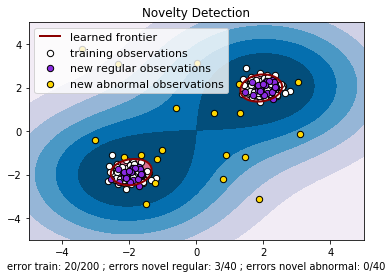

In [30]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

#### One Class SVM Tax and Duin

Rather than using a hypersurfice, we will use a sphere in feature space, around the data. The volume of this hypersphere is minimized, to minimize the effect of incorporating outliers in the solution.

The resulting hypersphere is characterized by a center $a$ and a radius $R>0$ as distance from the center to (any support vector on) the boundary, of which the volume $R^2$ will be minimized. The center $a$ is a linear combination of the support vectors (that are the training data points for which the Lagrange multiplier is non-zero). Just as the traditional formulation, it could be required that all the distances from data points $x_i$ to the center is strict less than $R$, or we can create a soft margin again slack variables $\xi_i$ with penalty parameter $C$. 

$min\, R^2+C\sum \xi_i $

with $||x_i-a||^2\leq R^2+\xi_i, \xi_i\geq 0$

In the library Libsvm http://www.csie.ntu.edu.tw/~cjlin/libsvm/ you can see information to use Tax and Duin version of SVM
https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/#libsvm_for_svdd_and_finding_the_smallest_sphere_containing_all_data

# sklearn.SVM

$SVC$ take as input two arrays: an array $X$ of size $[n_{samples}, n_{features}]$ holding the training samples, and an array $y$ of class labels (strings or integers), size $[n_{samples}]$.

In [17]:
from sklearn import svm
X = [[0, 0], [1, -1], [-1, 1], [-1, -1], [1, 1]]
y = [0,  1, 1, 1,1]
clf = svm.SVC()
clf.fit(X, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values:



In [13]:
clf.predict([[-.0000000002, -.000000000002]])

array([1])

In [23]:
import random
t = 2
a=[1,0]
while t<100:
    if not clf.predict([a]):
        print(a)
    a= [t**t, 0] 
    t = t+1

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in members: support\_vectors\_, support\_ and n\_support:

In [36]:
# get support vectors
clf.support_vectors_


array([[0., 0., 0.],
       [1., 1., 1.]])

In [37]:
# get indices of support vectors
clf.support_ 


array([0, 1])

In [47]:
# get number of support vectors for each class
clf.n_support_ 

array([1, 1])

In problems where it is desired to give more importance to certain classes or certain individual samples keywords class_weight and sample_weight can be used.

SVC  implement a keyword class_weight in the fit method. It’s a dictionary of the form {class_label : value}, where value is a floating point number > 0 that sets the parameter C of class class_label to C * value.

#### Example.

Automatically created module for IPython interactive environment
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  

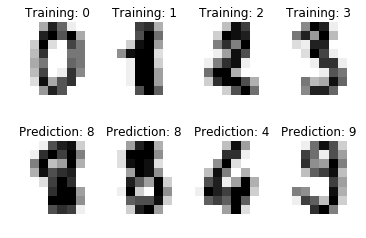

In [1]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

#### Regression.
The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.

As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values:

In [48]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y) 


clf.predict([[1, 1]])

array([1.5])

You can also use your own defined kernels by passing a function to the keyword kernel in the constructor.

Your kernel must take as arguments two matrices of shape (n_samples_1, n_features), (n_samples_2, n_features) and return a kernel matrix of shape (n_samples_1, n_samples_2).

The following code defines a linear kernel and creates a classifier instance that will use that kernel:

In [ ]:
import numpy as np
from sklearn import svm
def my_kernel(X, Y):
    return np.dot(X, Y.T)

clf = svm.SVC(kernel=my_kernel)

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: $C$ and $\gamma$. The parameter $C$, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low $C$ makes the decision surface smooth, while a high $C$ aims at classifying all training examples correctly. $\gamma$ defines how much influence a single training example has. The larger $\gamma$ is, the closer other examples must be to be affected.

Proper choice of $C$ and $\gamma$ is critical to the SVM’s performance. One is advised to use $sklearn.model\_selection.GridSearchCV$ with $C$ and $\gamma$ spaced exponentially far apart to choose good values.

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### Tips
Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation.

Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results.

Parameter $\nu$ in OneClassSVM\ $\nu$SVR approximates the fraction of training errors and support vectors.

In SVC, if data for classification are unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.


SVC and OneClassSVM implement also weights for individual samples in method fit through keyword sample_weight. Similar to class_weight, these set the parameter C for the i-th example to C * sample_weight[i].



For more details see http://scikit-learn.org/stable/modules/svm.html.

Face recognition example:

Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.828s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.038s
Fitting the classifier to the training set
done in 22.075s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.046s
                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.62      0.59        13
     Colin Powell       0.71      0.83      0.77        60
  Donald Rumsfeld       0.75      0.67      0.71        27
    George W Bush       0.88      0.88      0.88       146
Gerhard Schroeder       0.78      0.84      0.

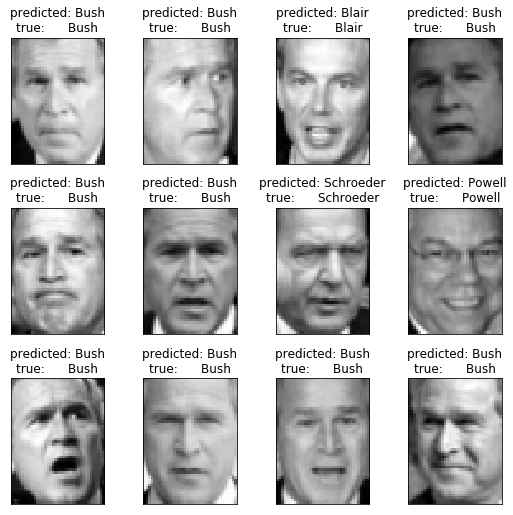

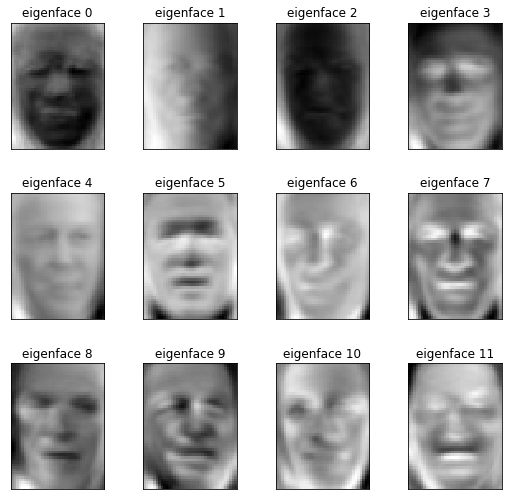

In [50]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()